In [2]:
import ants
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 读取 NIfTI 文件
# image = ants.image_read("./imgs/tmp_basic_mask.nii.gz")
image = ants.image_read("/mnt/labnas/DataCollection/Project/RadiSmart/cardiac/demo_nii/001398670/270_SA.nii.gz")
# image = ants.image_read("/mnt/labnas/DataCollection/Project/RadiSmart/cardiac/demo_nii/002640212/1278_SA.nii.gz")
img_arr = image.numpy()
image = ants.from_numpy(img_arr[:,:,:,0])

# 读取 NIfTI 文件
std_img = ants.image_read("/mnt/labnas/DataCollection/Project/RadiSmart/cardiac/demo_nii/000652515/161_SA.nii.gz")
img_arr = std_img.numpy()
std_img = ants.from_numpy(img_arr[:,:,:,0])

# def pad_img(source_img, ojb_shape=(24,24,24)):
#     diff_shape = np.array(ojb_shape) - np.array(source_img.shape)
#     if np.sum(diff_shape<0):
#         print(f"error, original shape: {source_img.shape}, dst shape: {ojb_shape}")
#     a1,b1,c1 = diff_shape//2
#     a2,b2,c2 = diff_shape - diff_shape//2
#     print(a1, b1, c1, a2, b2, c2)
#     return ants.pad_image(source_img, pad_width=[(a1, a2), (b1, b2), (c1, c2)])

image = ants.pad_image(image, shape=(24,24,24))
std_img = ants.pad_image(std_img, shape=(24,24,24))


image = ants.resample_image(image, (48,48,48), 1, 0)
std_img = ants.resample_image(std_img, (48,48,48), 1, 0)

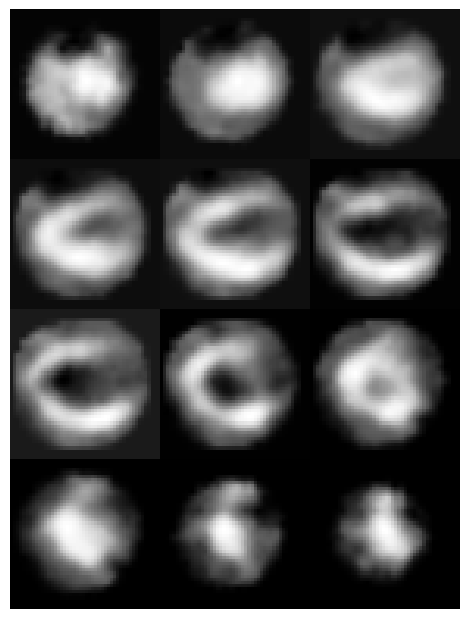

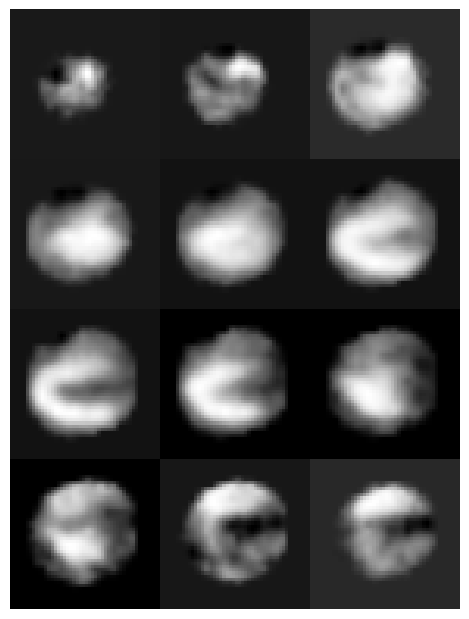

In [14]:
# plt.subplot(121)
ants.plot(image)

# plt.subplot(122)
ants.plot(std_img)

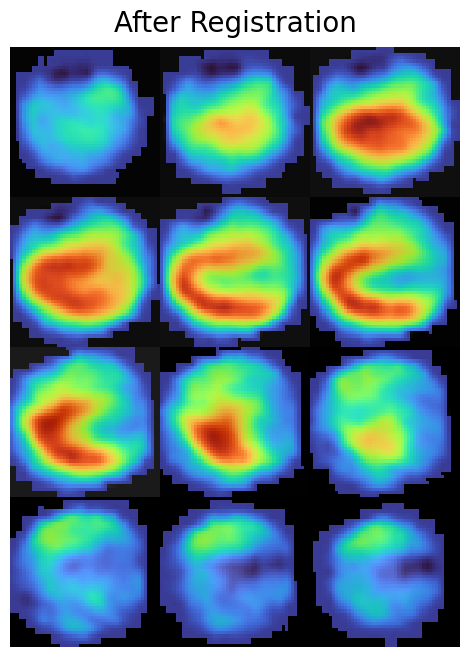

/tmp/tmp1yh_i9jt0GenericAffine.mat
ANTsTransform
	 Type       : AffineTransform
	 Dimension  : 3
	 Precision  : float

Affine Matrix:
 [ 0.84868371  0.09296276  0.00476959 -0.14987212  0.79111272  0.02194268
 -0.08437752  0.01143007  0.8072955  -1.81874812 -1.88314807  0.11289549]
[[ 0.84868371  0.09296276  0.00476959]
 [-0.14987212  0.79111272  0.02194268]
 [-0.08437752  0.01143007  0.8072955 ]
 [-1.81874812 -1.88314807  0.11289549]]


In [15]:
mytx = ants.registration(fixed=image , 
                         moving=std_img, 
                        #  type_of_transform='Similarity', 
                         type_of_transform='Affine', 
                          # 只允许 X/Y/Z 方向的缩放和平移
                          # (scaleX, scaleY, scaleZ, translateX, translateY, translateZ, rotateX, rotateY, rotateZ)
                         restrict_transformation=(1, 1, 1, 1, 1, 1, 0, 0, 0) )

warped_moving = mytx['warpedmovout']
image.plot(overlay=warped_moving,
           title='After Registration')

transMat_file = mytx['fwdtransforms'][-1]
print(transMat_file)
transMat = ants.read_transform(transMat_file)
print(transMat)
print("Affine Matrix:\n", transMat.parameters)
print(transMat.parameters.reshape(4,3))